| ![EEW logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/main/Jupyter%20instructions/eew.jpg?raw=true) | ![EDGI logo](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/main/Jupyter%20instructions/edgi.png?raw=true) |
|---|---|


This notebook is licensed under GPL 3.0. Please visit our Github [repo](https://github.com/edgi-govdata-archiving/ECHO_modules) for more information.

The notebook was collaboratively authored by the Environmental Data & Governance Initiative (EDGI) following [our authorship protocol](https://docs.google.com/document/d/1CtDN5ZZ4Zv70fHiBTmWkDJ9mswEipX6eCYrwicP66Xw/)

For more information about this project, visit [our website](https://www.environmentalenforcementwatch.org/)

This is a Jupyter Notebook - a way to organize Python computer programming code. Hosting the notebook on Google Colab allows you to access and visualize data without actually needing to do any coding! The code is left visible for individuals with a knowledge of Python or for those wondering how this site was put together. This allows for a more interactive user experience.

Be sure to read the instructions in "How to Run" (below)  and the notes above each cell for important tips and context!

# ECHO_modules
*ECHO_modules* is a Python package repository for analyzing a copy of the US Environmental Protection Agency's (EPA) Enforcement and Compliance History Online (ECHO) database.

### Background
The US EPA collects a wide variety of data concerning environmental pollution and makes this available through several portals. The ECHO database collates information on industrial facilities' compliance with environmental protection laws like the Clean Water Act and regulatory agencies' enforcement of those laws. ECHO records reported violations, agency inspections of facilities, penalties paid by companies for infractions. It also incorporates information from other sources, such as reported pollutant releases from the Toxics Release Inventory and socio-economic information from EJScreen.

Unfortunately, both the web portal for ECHO (echo.epa.gov) and its API have a number of limitations. First, EPA generally only makes the past 3-5 years worth of data available through these services. Second, EPA typically does not allow aggregating information into meaningful views, such as reports of inspections by Census tract or ZIP code. Instead, searches on echo.epa.gov are usually facility-oriented. This makes it hard to understand the state of environmental enforcement and compliance across an entire geography, company, or industry sector.

In response, we make regular copies of the full set of historical records in ECHO by scraping echo.epa.gov [here](https://echo.epa.gov/files/echodownloads/). We load a number of specific tables into a [Postgresql database](https://github.com/sunggheel/edgipgdb) hosted at Stony Brook University (SBU). These tables are then linked with one another through various lookups and materialized views. For instance, the table that contains summary information about facilities (ECHO_EXPORTER) is linked to the table with detailed records on Clean Water Act violations through the `NPDES_ID` key.

`ECHO_modules` provides convenient dataset definitions and pre-defined queries that enable users to retrieve information from the SBU database and to visualize it as tables, maps, and charts. It also supports user-defined queries. With `ECHO_modules`, users can easily access summaries of EPA's records for specific geographies (e.g. a set of ZIP codes) and examine these records in relation to EPA's measures of environmental inequalities (from EJScreen).

Learn more about the SBU copy of ECHO and how it is used by ECHO_modules [here](https://github.com/edgi-govdata-archiving/ECHO_modules/blob/main/SBU-db.md). EDGI's Environmental Enforcement Watch (EEW) works with `ECHO_modules` extensively. For more on the EEW project, visit [here](https://environmentalenforcementwatch.org/) or check out project-specific repositories in the EDGI organization on GitHub.

### Interpreting ECHO Data
The ECHO database is notoriously incomplete and biased. EDGI EEW's own research, based on `ECHO_modules` and published [here](https://envirodatagov.org/wp-content/uploads/2022/09/Gaps_and_Disparities_Report.pdf), has found the following:

> * Over 19,000 facilities regulated under foundational environmental protection laws are missing basic information such as their latitude and longitude. Nearly all — 19,657 out of 19,675 (99.9%) — of these are SDWA-regulated facilities.
> * Data needed for basic EJ assessments, such as the percent minority population surrounding a facility or the Census block it resides in, is missing for 14% of the facilities in EPA’s most public-facing database. This increases to 83% of facilities regulated under SDWA.
> * Nationally, the typical facility regulated under each of these environmental protection laws is missing:
>   * 86% of CWA-specific information
>   * 86% of RCRA-specific information
>   * 71% of CAA-specific information
>   * 40% of SDWA-specific information
> * Facilities in majority-minority communities have somewhat worse data quality scores than facilities in majority-white communities, for all acts except SDWA.
> * Data missingness is substantially worse for facilities in areas already screened by EPA to be of particular concern for environmental injustices and majority-minority areas when looking at Clean Water Act inspections in particular.
> * 78% of all facilities regulated under the CWA are missing inspection counts, but only 75% of facilities in majority white areas, rising to 83% of facilities in majority-minority areas.
> * Western states including Texas, New Mexico, Colorado, Utah, and Nevada are much worse when it comes to inspection data completeness for facilities in majority-minority communities.

Simply put, ECHO records are flawed because they rely on industry and state self-reporting. For instance, the emissions levels industry provides to EPA are typically estimates rather than direct measurements. ProPublica [has found](https://www.propublica.org/article/whats-polluting-the-air-not-even-the-epa-can-say) that these estimates actually tend to be *overestimates* - industry knows EPA lacks the will and capacity to look into large emitters, while submitting lower numbers might raise suspicion.

ECHO records also reflect a flawed governance system. Determining that a facility is in violation of its permit to pollute typically requires either accurate and honest self-reporting of emissions, or regulatory inspections of the facility. However, facility inspections have been in decline since at least the Obama administration. Thus, "true" violations are unlikely to be noticed and recorded. In other words, the ECHO database is rife with type II statistical errors ("false negatives").

Even when violations are flagged, it is important to keep in mind that these represent emissions above and beyond permitted thresholds (if they are not paperwork violations), but whether or not these permitted thresholds are adequate is entirely different question. Just because a facility is *not* in violation of its permit does not mean that it is inconsequential to human and environmental health, since most permits to pollute do not account for the cumulative effects of multiple polluters in a region or the synergistic effects of multiple pollutants.

[According to](https://global.oup.com/academic/product/next-generation-compliance-9780197656747) former EPA director of enforcement and compliance assurance Cynthia Giles (2020), records related to the Clean Water Act's National Pollutant Discharge Elimination System (NPDES) tend to be the most reliable, in part because of federal requirements that all regulated facilities submit digitized records straight to US EPA.

Any interpretations you make of ECHO data accessed through `ECHO_modules` should keep all the above in mind. For instance, EEW prefers to use language such as "reported violations" and "estimated emissions" when discussing findings.

### How to Run this Notebook
![Instructions for running a Jupyter Notebook](https://github.com/edgi-govdata-archiving/EEW-Image-Assets/blob/main/overall_instructions.png?raw=true)

# Install ECHO_modules

In [ ]:
!pip install ECHO_modules &>/dev/null; # ECHO_modules

# Basic Usage
## Analyze Currently Active Facilities in a County

In the following example, we retrieve all of the currently active facilities (according to EPA) in Erie County in New York.

In [2]:
from ECHO_modules.utilities import get_active_facilities # Use the get_active_facilities function

erie = get_active_facilities("NY", "County", ["ERIE"])
erie

/usr/local/lib/python3.11/dist-packages/ECHO_modules/get_data.py:30: DtypeWarning: Columns (5,57,73,119) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv(data_location,encoding='iso-8859-1',


FAC_NAME  \
REGISTRY_ID                                                       
110071394313  NIAGARA MOHAWK POWER CORP A NATIONAL GRID CO M...   
110009470982                     NATIONAL GRID NORTH ANGOLA SUB   
110071380921                                UPMR ANALYTICAL LLC   
110008077179                                 NYSDOT BIN 1022590   
110071432649                         PENSKE TRUCK LEASING CO LP   
...                                                         ...   
110000573987                     CITY OF BUFFALO WATER FACILITY   
110000326772                                TONAWANDA COKE CORP   
110000326996                             PVS CHEMICAL SOLUTIONS   
110000327316  SUMITOMO RUBBER USA, LLC (FMR GOODYEAR DUNLOP ...   
110000881118                          PRAXAIR TECHNOLOGY CENTER   

                            FAC_STREET         FAC_CITY FAC_STATE  FAC_ZIP  \
REGISTRY_ID                                                                  
110071394313  37 SWAN ST MH 37 & MH 51          BUFFALO        NY    14203   
110009470982         DELAMETER & GOWAN           ANGOLA        NY    14006   
110071380921      8615 ROLL RD STE 407  CLARENCE CENTER        NY    14032   
110008077179       HIGH ST OVER RTE 33          BUFFALO        NY    14209   
110071432649          2315 KENMORE AVE          BUFFALO        NY    14207   
...                                ...              ...       ...      ...   
110000573987              2 PORTER AVE          BUFFALO        NY  14201.0   
110000326772            3875 RIVER RD.        TONAWANDA        NY  14150.0   
110000326996                 55 LEE ST          BUFFALO        NY  14210.0   
110000327316         10 SHERIDAN DRIVE        TONAWANDA        NY  14150.0   
110000881118             175 E PARK DR        TONAWANDA        NY  14150.0   

             FAC_COUNTY  FAC_FIPS_CODE  FAC_EPA_REGION FAC_INDIAN_CNTRY_FLG  \
REGISTRY_ID                                                                   
110071394313       ERIE        36029.0             2.0                    N   
110009470982       ERIE        36029.0             2.0                    N   
110071380921       ERIE        36029.0             2.0                    N   
110008077179       ERIE        36029.0             2.0                    N   
110071432649       ERIE        36029.0             2.0                    N   
...                 ...            ...             ...                  ...   
110000573987       ERIE        36029.0             2.0                    N   
110000326772       ERIE        36029.0             2.0                    N   
110000326996       ERIE        36029.0             2.0                    N   
110000327316       ERIE        36029.0             2.0                    N   
110000881118       ERIE        36029.0             2.0                    N   

             FAC_FEDERAL_FLG  ...  FAC_DATE_LAST_INSPECTION_STATE  \
REGISTRY_ID                   ...                                   
110071394313             NaN  ...                             NaN   
110009470982             NaN  ...                             NaN   
110071380921             NaN  ...                             NaN   
110008077179             NaN  ...                             NaN   
110071432649             NaN  ...                             NaN   
...                      ...  ...                             ...   
110000573987             NaN  ...                      03/16/2021   
110000326772             NaN  ...                      09/25/2018   
110000326996             NaN  ...                      03/11/2025   
110000327316             NaN  ...                      06/13/2024   
110000881118             NaN  ...                      09/18/2024   

             FAC_DATE_LAST_FORMAL_ACT_EPA FAC_DATE_LAST_FORMAL_ACT_ST  \
REGISTRY_ID                                                             
110071394313                          NaN                         NaN   
110009470982           

## Save this Data to CSV Format

This will export the above dataframe as a CSV. If running this notebook in Google Colab, the CSV can be found by clicking on the folder on the left-hand side of the screen and then opening the CSV sub-folder, right-clicking on the "Facilities-NY-County-Erie.csv" file and choosing Download.

First you are able to customize the name of the file we will be creating.

In [3]:
## You may enter a name to use for the file, or use the one provided.
from ECHO_modules.utilities import dataset_filename, write_dataset

filename_widget = dataset_filename(base='Facilities',
               type='County', state='NY', regions=['Erie'])

Text(value='Facilities-NY-County-Erie.csv', description='File name:')

...and now you can write the file.

In [4]:
from ECHO_modules.utilities import write_dataset
write_dataset(erie, filename_widget.value)

Wrote CSVs/Facilities-NY-County-Erie.csv


## Find and Chart the 10 Facilities Least Compliant with the Resource and Conservation Recovery Act (RCRA) over the Past 12 Quarters in this County

EPA provides summary data on inspections, violations, and penalties under various environmental protection laws. In the following example, we access that summary data for RCRA-regulated facilities in Erie County, sort it, and then chart it.

<Axes: title={'center': 'RCRA facilities with the most non-compliant quarters in NY - Erie County'}, xlabel='Non-compliant quarters', ylabel='Facility'>

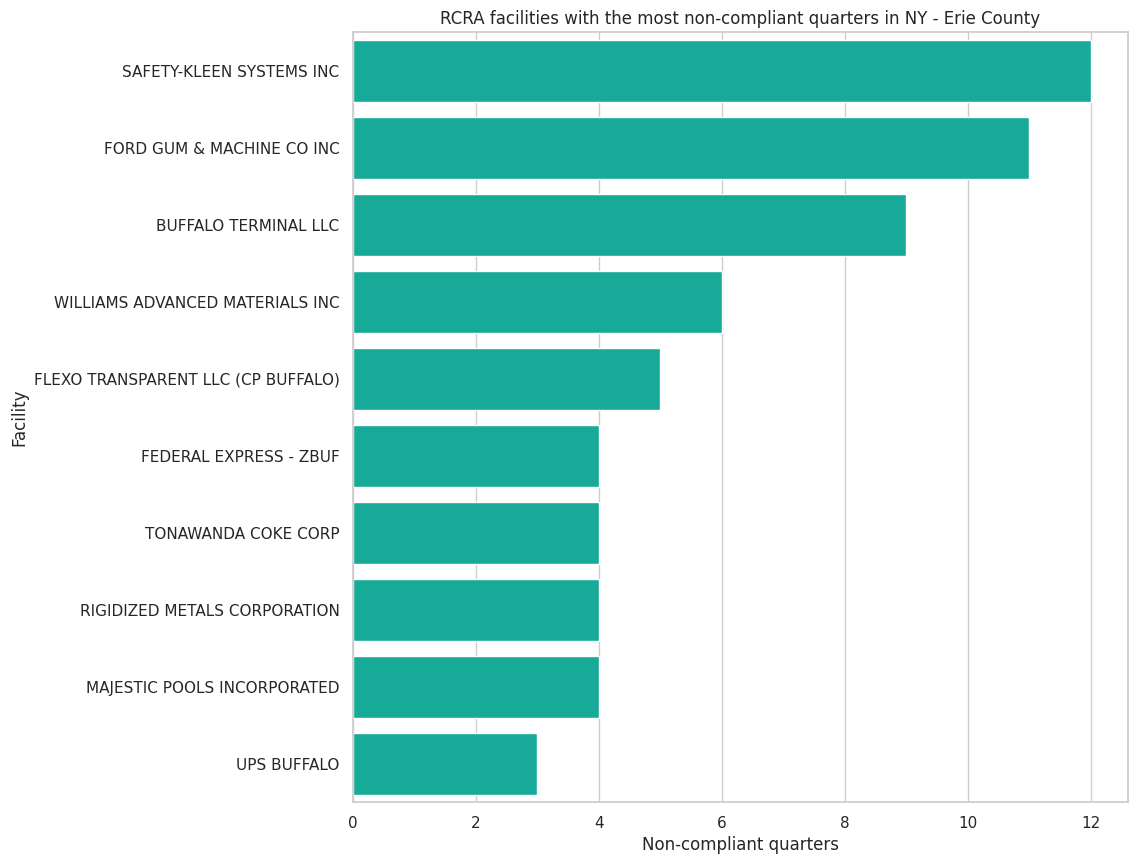

In [5]:
# Next, we enter the dataframe of Erie County facilities into the get_top_violators() function, then use chart_top_violators to visualize the result
# Use get_top_violators and chart_top_violators
from ECHO_modules.utilities import get_top_violators, chart_top_violators

erie_top_violators = get_top_violators( erie, flag = 'RCRA_FLAG',
                                       noncomp_field = 'RCRA_3YR_COMPL_QTRS_HISTORY',
                                        action_field = 'RCRA_FORMAL_ACTION_COUNT',
                                        num_fac=10 )
chart_top_violators(erie_top_violators, state = 'NY', selections = "Erie County",
                    epa_pgm = "RCRA" )

## Map these Top 10 RCRA Violators

In [7]:
import geopandas # Import a Python package for creating spatial dataframes
from ECHO_modules.get_data import get_spatial_data # Module for getting spatial data from the SBU database
from ECHO_modules.geographies import spatial_tables # Variables that support spatial queries
from ECHO_modules.utilities import bivariate_map, map_style # Use this function and variable to make our map

# Query and return spatial data
county, state = get_spatial_data( region_type = "County", states = ["NY"],
                                 spatial_tables = spatial_tables, region_filter = "Erie")
bivariate_map(regions = county,
              points = geopandas.GeoDataFrame(erie_top_violators,
                                              geometry=geopandas.points_from_xy(
                                                  erie_top_violators['FAC_LONG'],
                                                  erie_top_violators['FAC_LAT']),
                                                  crs=4269
                                              )
              ) # Use Geopandas to create a spatial version of this dataframe so that it can be mapped

## Create DataSet templates for all the types of ECHO records

EPA not only produces summary information on environmental enforcement and compliance programs (in its ECHO_EXPORTER records), it provides access to "raw" historical records. These can be accessed through our DataSet collections. Here we will create all of the types of DataSet. These won't hold any records yet. They are just the containers for the types of data. We will populate some of these data_sets later.

In [8]:
from ECHO_modules.make_data_sets import make_data_sets

## List of datasets to choose from
data_sets = make_data_sets([
    "RCRA Violations",
    "RCRA Inspections",
    "RCRA Penalties",
    "CAA Violations",
    "CAA Penalties",
    "CAA Inspections",
    "Combined Air Emissions",
    "Greenhouse Gas Emissions",
    "Toxic Releases",
    "CWA Violations",
    "CWA Inspections",
    "CWA Penalties",
    "SDWA Site Visits",
    "SDWA Enforcements",
    "SDWA Public Water Systems",
    "SDWA Violations",
    "SDWA Serious Violators",
    "2022 Discharge Monitoring",
    "Effluent Violations",
])
## These are described in more detail here: https://github.com/edgi-govdata-archiving/ECHO_modules/blob/main/ECHO_modules/data_set_presets.py
## and here: https://echo.epa.gov/tools/data-downloads#downloads


## Get Historical Records of RCRA Violations in this County

Here we will populate one of the DataSet containers, the one for "RCRA Violations", with a request for specific data. We use the DataSet's store_results() function to get the data from the database and keep it in a DatSetResults container owned by the DataSet.

EPA says records prior to 2001 are unreliable. First we'll let you select your years of interest...

In [9]:
from ECHO_modules.utilities import show_year_range_widget
## Slide the endpoints to the desired years
year_range = show_year_range_widget()

SelectionRangeSlider(description='Dates', index=(0, 54), layout=Layout(width='500px'), options=(1970, 1971, 19…

...and now we can populate the RCRA Violations DataSet for those years.

In [10]:
# Store results for this DataSet as a DataSetResults object
erie_rcra_violations = data_sets["RCRA Violations"].store_results(
    region_type="County", region_value=["ERIE"], state="NY", years=year_range.value)
erie_rcra_violations.dataframe # Show the results as a dataframe

Data last modified: 2025-03-30 00:00:00
There were 716 program records found


ACTIVITY_LOCATION VIOLATION_TYPE  \
ID_NUMBER                                       
NYR000136309                NY          262.C   
NYR000136309                NY          262.C   
NYR000136309                NY          273.B   
NYR000072223                NY          262.A   
NYD071475867                NY          262.A   
...                        ...            ...   
NYR000087874                NY          273.B   
NYD981489115                NY          261.A   
NYR000071886                NY          261.A   
NYN008029498                NY          273.B   
NYD981079700                NY          273.B   

                                            VIOLATION_TYPE_DESC  \
ID_NUMBER                                                         
NYR000136309  Standards Applicable to Generators of HW: Pre-...   
NYR000136309  Standards Applicable to Generators of HW: Pre-...   
NYR000136309  Standards for Universal Waste Management: Stan...   
NYR000072223  Standards Applicable to Generators of HW: General   
NYD071475867  Standards Applicable to Generators of HW: General   
...                                                         ...   
NYR000087874  Standards for Universal Waste Management: Stan...   
NYD981489115                      ID and Listing of HW: General   
NYR000071886                      ID and Listing of HW: General   
NYN008029498  Standards for Universal Waste Management: Stan...   
NYD981079700  Standards for Universal Waste Management: Stan...   

             VIOL_DETERMINED_BY_AGENCY DATE_VIOLATION_DETERMINED  \
ID_NUMBER                                                          
NYR000136309                       S                  2021-09-08   
NYR000136309                       S                  2021-09-08   
NYR000136309                       S                  2021-09-08   
NYR000072223                       S                  2012-03-22   
NYD071475867                       S                  2024-10-28   
...                                ...                       ...   
NYR000087874                       S                  2007-05-01   
NYD981489115                       S                  2008-04-22   
NYR000071886                       S                  2008-06-26   
NYN008029498                       S                  2017-11-27   
NYD981079700                       S                  2013-04-30   

             ACTUAL_RTC_DATE SCHEDULED_COMPLIANCE_DATE  FAC_DERIVED_HUC  \
ID_NUMBER                                                                 
NYR000136309      09/29/2021                       NaN        4120104.0   
NYR000136309      09/08/2021                       NaN        4120104.0   
NYR000136309      09/29/2021                       NaN        4120104.0   
NYR000072223      06/29/2012                       NaN        4120103.0   
NYD071475867      11/12/2024                       NaN        4120104.0   
...                      ...                       ...              ...   
NYR000087874      06/01/2007                       NaN        4120103.0   
NYD981489115      05/21/2008                       NaN        4120103.0   
NYR000071886      09/05/2008                       NaN        4120104.0   
NYN008029498      02/22/2018                       NaN        4120103.0   
NYD981079700      05/21/2013                       NaN        4120104.0   

               REGISTRY_ID                                           FAC_NAME  \
ID_NUMBER                                                                       
NYR000136309  110024426049                                TARGET STORE #T1010   
NYR000136309  110024426049                                TARGET STORE #T1010   
NYR000136309  110024426049                                TARGET STORE #T1010   
NYR000072223  110004553572                                    CURTIS SCREW CO   
NYD071475867  110000880100  STATE UNIVERSITY OF NEW YORK-SUNY BUFFALO-SOUT...   
...                    ...                                                .

## Show RCRA Violations Over Time in a Chart

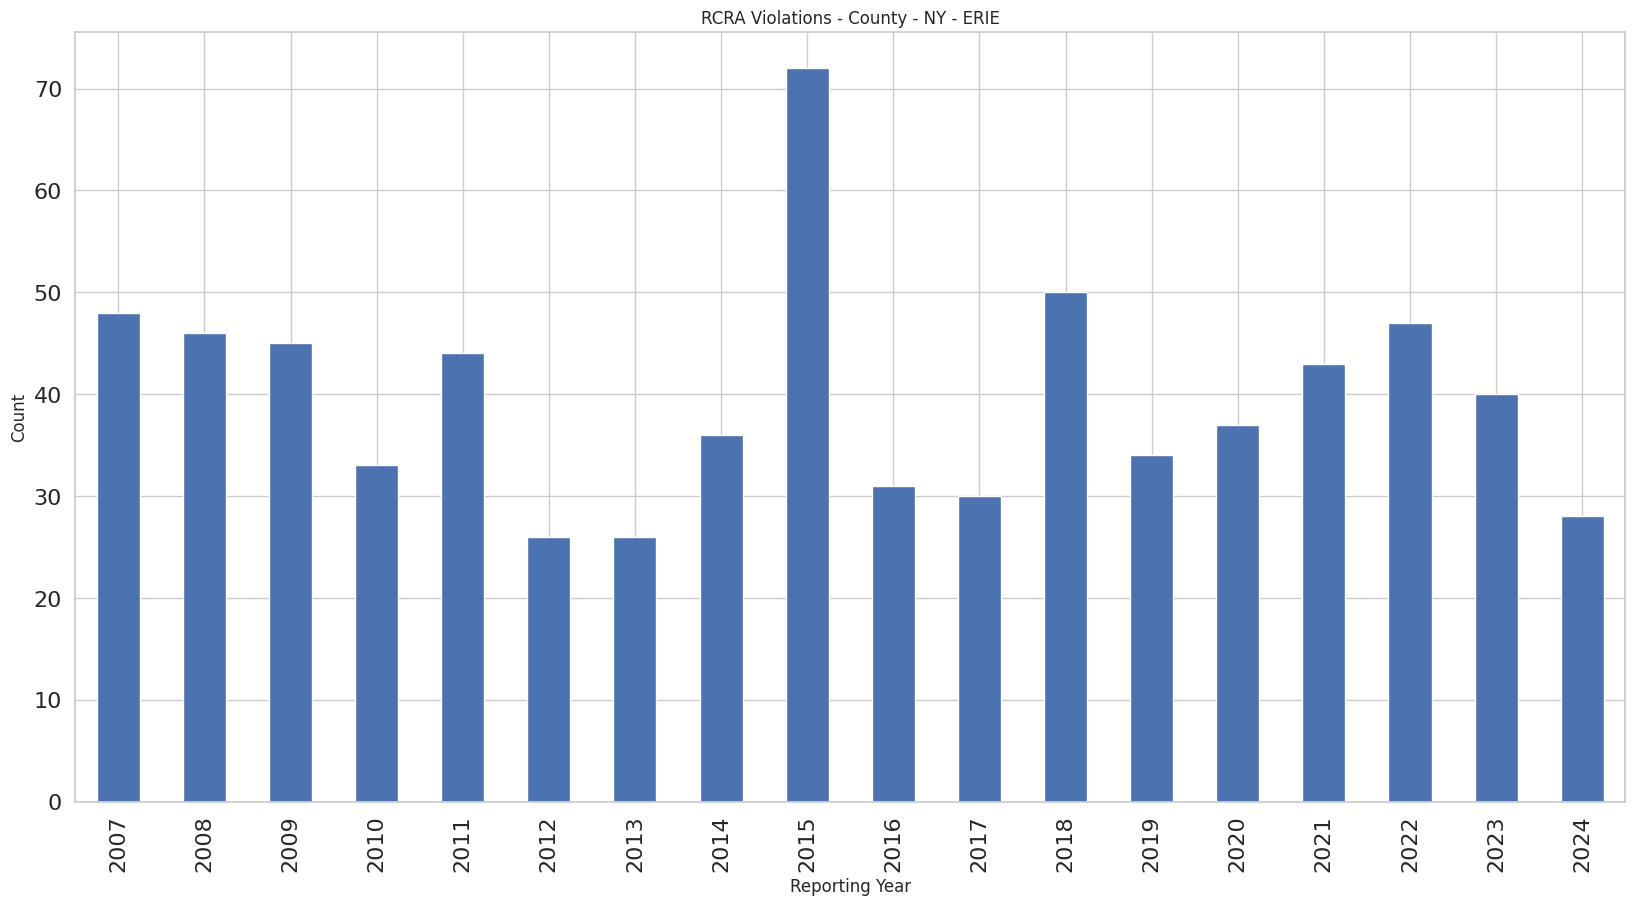

In [11]:
erie_rcra_violations.show_chart()

## Map Facilities in this County with Recorded RCRA Violations

In [12]:
from ECHO_modules.utilities import aggregate_by_facility, point_mapper # Import relevant modules

erie_rcra_violations.region_value=["ERIE"] # (re)set the region_value as a list
# Aggregate each entry using this function. In the case of RCRA violations,
# it will summarize each type of violation (permit, schedule, effluent, etc.)
# and then aggregate them for each facility over time.
# By setting other_records to True, we also get RCRA-regulated facilities in the
# county without records of violations.
aggregated_results = aggregate_by_facility(
    erie_rcra_violations, erie_rcra_violations.dataset.name, other_records=True)
# Map each facility as a point, the size of which corresponds to the number of reported violations since 2001.
point_mapper(aggregated_results["data"], aggregated_results["aggregator"],
             quartiles=True, other_fac=aggregated_results["diff"])

/usr/local/lib/python3.11/dist-packages/ECHO_modules/get_data.py:30: DtypeWarning: Columns (5,56,57,73,119) have mixed types. Specify dtype option on import or set low_memory=False.
  ds = pd.read_csv(data_location,encoding='iso-8859-1',


# Advanced Usage

## Select an area of interest using a map
Administrative boundaries like counties are only so meaningful when it comes to understanding environmental pollution, enforcement, and compliance trends near you. You might want to draw your own neighborhood - this utility lets you do that, and then retrieve records for facilities within those boundaries.

Run the following cell, use the tools in the left part of the map to create a shape, and then run the cell that follows to retrieve Clean Air Act violations for the area.

In [25]:
from ECHO_modules.utilities import polygon_map
area_of_interest = polygon_map()
area_of_interest[0]

Map(center=[39.8282, -98.5796], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'z…

In [31]:
# Populate the CAA Violations DataSet that was created earlier.
# Store results for this DataSet as a DataSetResults object
try:
    aoi_caa_violations = data_sets["CAA Violations"].store_results( region_type="Neighborhood",
                            region_value=list(area_of_interest[1])[0], years=[2020,2024] )
    display(aoi_caa_violations.dataframe)
except:
    print("There are no records in that region for this data set.")

845 ids were searched
25 program records were found


ACTIVITY_ID AGENCY_TYPE_DESC STATE_CODE  AIR_LCON_CODE  \
PGM_SYS_ID                                                               
IL000031030AFR   3603053913            State         IL            NaN   
IL000031817AAM   3603014399            State         IL            NaN   
IL000031051AFP   3602797936            State         IL            NaN   
IL000031030AAG   3604028097            State         IL            NaN   
IL000031186AMR   3603474561            State         IL            NaN   
IL000031225ABE   3603360836            State         IL            NaN   
IL000031225ABE   3604186939            State         IL            NaN   
IL000031817AAA   3604186951            State         IL            NaN   
IL000031600EEF   3602460883            State         IL            NaN   
IL000031051APL   3603409851            State         IL            NaN   
IL000031051APL   3604337102            State         IL            NaN   
IL000031300AAL   3602901485            State         IL            NaN   
IL000031300AAL   3604337100            State         IL            NaN   
IL000031600BSY   3602460884            State         IL            NaN   
IL000031600BGU   3602186070            State         IL            NaN   
IL000031600BGU   3603934463            State         IL            NaN   
IL000031300AAJ   3602274758            State         IL            NaN   
IL000031300AAJ   3602768674            State         IL            NaN   
IL000031300AAJ   3602878530            State         IL            NaN   
IL000031300AAJ   3603736496            State         IL            NaN   
IL000031015AAC   3603583635            State         IL            NaN   
IL000031051AFF   3604186941            State         IL            NaN   
IL000031817AAB   3603762047            State         IL            NaN   
IL000031051AAZ   3602425094            State         IL            NaN   
IL000031051AAZ   3603690139            State         IL            NaN   

               COMP_DETERMINATION_UID ENF_RESPONSE_POLICY_CODE  PROGRAM_CODES  \
PGM_SYS_ID                                                                      
IL000031030AFR     IL000AA-2022-00029                      FRV         CAASIP   
IL000031817AAM     IL000AA-2021-00496                      FRV         CAASIP   
IL000031051AFP     IL000AA-2021-00361                      FRV         CAASIP   
IL000031030AAG     IL000AA-2024-00074                      FRV  CAASIP CAATVP   
IL000031186AMR     IL000AA-2022-00156                      FRV         CAASIP   
IL000031225ABE     IL000AA-2022-00125                      FRV         CAASIP   
IL000031225ABE     IL000AA-2024-00115                      FRV         CAASIP   
IL000031817AAA     IL000AA-2024-00125                      FRV         CAASIP   
IL000031600EEF     IL000AA-2021-00103                      FRV  CAASIP CAATVP   
IL000031051APL     IL000AA-2022-00152                      FRV  CAASIP CAATVP   
IL000031051APL     IL000AA-2024-00185                      FRV  CAASIP CAATVP   
IL000031300AAL     IL000AA-2021-00469                      FRV  CAASIP CAATVP   
IL000031300AAL     IL000AA-2024-00171                      FRV  CAASIP CAATVP   
IL000031600BSY     IL000AA-2021-00101                      FRV         CAASIP   
IL000031600BGU     IL000AA-2020-00124                      FRV  CAASIP CAATVP   
IL000031600BGU     IL000AA-2024-00036                      FRV  CAASIP CAATVP   
IL000031300AAJ     IL000AA-2020-00307                      HPV  CAASIP CAATVP   
IL000031300AAJ     IL000AA-2021-00217                      FRV  CAASIP CAATVP   
IL000031300AAJ     IL000AA-2021-00492                      FRV  CAASIP CAATVP   
IL000031300AAJ     IL000AA-2023-00162                      FRV  CAASIP CAATVP   
IL000031015AAC     IL000AA-2023-00031                      FRV  CAASIP CAATVP   
IL000031051AFF     IL000AA-2024-00113                      FRV         CAASIP   
IL000031817AAB     IL000AA-2023-00174                      FRV  CAASIP CA

## Watersheds
Many people may not know the formal name of the watershed they live in (and since watersheds are nested within each other, people live in several watersheds of various sizes, each of which likely has a different name, compounding the challenge).

Most people do, however, know which ZIP code or county they live in. To get ECHO data on a watershed basis, first we query the database for the watersheds intersecting a more well-known geography. (Note: technically, we look up watersheds *within* a more well-known geography. Unfortunately, this means some watersheds will never be selected because they are not fully contained by a state. This is an issue to be fixed.)

In the following example, we get the watersheds that intersect with a state and then look up "serious violators' of the Safe Drinking Water Act within one of those watersheds.

Note: Watershed geographies do not require setting the `state` variable to retrieve data/store results.

In [32]:
from ECHO_modules.get_data import get_spatial_data
from ECHO_modules.geographies import spatial_tables
from ECHO_modules.utilities import show_regions

# We look up intersecting watersheds on a state(s) basis.
watersheds, state = get_spatial_data(region_type = "Watershed", states = ["NY"],
                                     spatial_tables = spatial_tables)
# Map out the watersheds to make it clearer which one we want
show_regions(regions = watersheds, states = state, region_type = "Watershed",
             spatial_tables = spatial_tables)

watershed = watersheds.loc[watersheds["name"] == "Seneca"] # Filter to the watershed we're interested in
ds = make_data_sets(["SDWA Serious Violators"]) # Create a DataSet for handling that watershed's data
# Store results for this DataSet as a DataSetResults object.
# In some cases we have to add a "0" back on to the watershed id when it gets
# convereted to an integer.
seneca_sdwa = ds["SDWA Serious Violators"].store_results(
    region_type="Watershed", region_value=["0"+str(watershed["huc8"].iloc[0])])
seneca_sdwa.dataframe

Data last modified: 2022-01-14 00:00:00
There were 19 program records found


PWS_NAME     CITY_SERVED STATE    STATE_NAME  \
PWSID                                                                           
NY6112886       SENECA DRUMS TRAILER PARK        MILO (T)    NY      New York   
NY6112886       SENECA DRUMS TRAILER PARK        MILO (T)    NY      New York   
NY3304334                   SYRACUSE CITY    SYRACUSE (C)    NY      New York   
NY4901195                    OVID VILLAGE        OVID (V)    NY      New York   
NY4901195                    OVID VILLAGE        OVID (V)    NY      New York   
NY6112907             TURTLE ROCK VILLAGE        MILO (T)    NY      New York   
NY6112907             TURTLE ROCK VILLAGE        MILO (T)    NY      New York   
NY6112907             TURTLE ROCK VILLAGE        MILO (T)    NY      New York   
NY0512920                   WELLS COLLEGE      AURORA (V)    NY      New York   
NY3430021           MANCHESTER CENTRAL WD  MANCHESTER (T)    NY      New York   
NY4830037          DIX  WATER DISTRICT #1         DIX (T)    NY      New York   
NY3430041                   BRISTOL WD #1     BRISTOL (T)    NY      New York   
NY3430041                   BRISTOL WD #1     BRISTOL (T)    NY      New York   
NY5000755  PLEASANT VALLEY MOBILE HOME PK     LINDLEY (T)    NY      New York   
NY5000755  PLEASANT VALLEY MOBILE HOME PK     LINDLEY (T)    NY      New York   
PA2580910     PRIESTHOOD RESTORATION SITE             NaN    PA  Pennsylvania   
NY6101261                 DRESDEN VILLAGE     DRESDEN (V)    NY      New York   
NY6101261                 DRESDEN VILLAGE     DRESDEN (V)    NY      New York   
NY3700938                NORTHRIDGE ACRES  SCHROEPPEL (T)    NY      New York   

          PWS_TYPE_CODE PWS_TYPE_SHORT SOURCE_WATER    PWS_SIZE  \
PWSID                                                             
NY6112886         TNCWS  Non-Community           SW  Very Small   
NY6112886         TNCWS  Non-Community           SW  Very Small   
NY3304334           CWS      Community           SW  Very Large   
NY4901195           CWS      Community           SW       Small   
NY4901195           CWS      Community           SW       Small   
NY6112907           CWS      Community           SW  Very Small   
NY6112907           CWS      Community           SW  Very Small   
NY6112907           CWS      Community           SW  Very Small   
NY0512920           CWS      Community           SW  Very Small   
NY3430021           CWS      Community           SW       Small   
NY4830037           CWS      Community           SW  Very Small   
NY3430041           CWS      Community           SW  Very Small   
NY3430041           CWS      Community           SW  Very Small   
NY5000755           CWS      Community           GW  Very Small   
NY5000755           CWS      Community           GW  Very Small   
PA2580910         TNCWS  Non-Community           GW  Very Small   
NY6101261           CWS      Community           SW       Small   
NY6101261           CWS      Community           SW       Small   
NY3700938           CWS      Community           GW  Very Small   

           POPULATION_SERVED_COUNT  FISCAL_YEAR  ...    FAC_LAT   FAC_LONG  \
PWSID                                            ...                         
NY6112886                       80         2019  ...  42.834730 -77.300600   
NY6112886                       80         2018  ...  42.834730 -77.300600   
NY3304334                   192000         2011  ...  43.050750 -76.127605   
NY4901195                      990         2016  ...  42.678600 -76.823910   
NY4901195                      990         2015  ...  42.678600 -76.823910   
NY6112907                       48         2018  ...  42.595853 -76.920574   
NY6112907                       48         2011  ...  42.595853 -76.920574   
NY6112907                       48         2012  ...  42.595853 -76.920574   
NY0512920                      400         2016  ...  42.745895 -76.700788   
NY3430021                      980         2015  ...  42.971290 -

## Ways of Selecting Records on Facilities

A user may have facility IDs obtained, perhaps, from outside of the ECHO data. As examples, RCRA data uses a field called ID_NUMBER and CAA uses PGM_. The database has mapped program-specific IDs to the REGISTRY_IDs that are used in the ECHO_EXPORTER table. Because of that mapping, we can generally work with the REGISTRY_ID to identify a facility. But we could also get to the same data, in the case of RCRA, by asking for the facilities by their ID_NUMBER.

Here we show the two ways of requesting data on facilities, again using RCRA Violations as our example.

### Select Records by Facility Program IDs

We'll use some data we acquired earlier, erie_rcra_violations, to get some of the RCRA program-specific ID_NUMBERs. Then we'll ask the database for records using those ID_NUMBERS and show that the number of records is the same

In [33]:
print(f'The RCRA Violations data contains {len(erie_rcra_violations.dataframe)} records.')

## Even though we already have the same data, we'll get the list of ID_NUMBER values
## and get the data another way. We should get the same data.
ids = erie_rcra_violations.dataframe.index.unique().to_list()
## Pretend we were given this list of facility ID_NUMBERS and asked to get the RCRA Violation
## records for the selected years.
second_results = data_sets['RCRA Violations'].store_results_by_ids(ids, region_type="Facilities",
                                              use_registry_id=False, years=year_range.value)
print(f'second_results contains {len(second_results.dataframe)} records.')

The RCRA Violations data contains 716 records.
254 ids were searched
716 program records were found
second_results contains 716 records.


### Select Records by REGISTRY_ID

Now we'll go the other direction--we'll take the REGISTRY_IDs from our second_results and ask the database for the matching records. We should again get the same records.

In [34]:
ids = second_results.dataframe['REGISTRY_ID'].unique().tolist()
## This time, pretend we were given this list of facility REGISTRY_IDs and asked to get the RCRA Violation
## records for the selected years.
third_results = data_sets['RCRA Violations'].store_results_by_ids(ids, region_type="Facilities",
                                              use_registry_id=True, years=year_range.value)
print(f'third_results contains {len(third_results.dataframe)} records.')

253 ids were searched
716 program records were found
third_results contains 716 records.


## Multiple Geographies
A DataSetResults object can only store one kind of geography (e.g. ZIP codes OR Counties) but it can store multiple values of that geography (e.g. ZIPs: 53703, 52358, 04345, etc.)

Notes: ZIP Code geographies do not require setting the `state` variable to retrieve data/store results. Also, unlike with counties, which we look retrieve data for using a list like `region_value = ["ERIE"]`, for ZIP codes and watersheds we provide values in a string like `region_value = '14201,14202,14203'`

In [35]:
from ECHO_modules.make_data_sets import make_data_sets # Import relevant module
from ECHO_modules.utilities import aggregate_by_facility, point_mapper # Import relevant modules

ds = make_data_sets(["CWA Inspections"]) # Create a DataSet for handling the data
# Store results for this DataSet as a DataSetResults object
buffalo_cwa_inspections = ds["CWA Inspections"].store_results(
    region_type="Zip Code", region_value='14201,14202,14203')
aggregated_results = aggregate_by_facility(
    records = buffalo_cwa_inspections,
    program = buffalo_cwa_inspections.dataset.name,
    other_records=True) # Aggregate each entry using this function
# Map each facility as a point, the size of which corresponds to the number of reported violations since 2001.
point_mapper(aggregated_results["data"], aggregated_results["aggregator"],
             quartiles=True, other_fac=aggregated_results["diff"])

Data last modified: 2025-03-30 00:00:00
There were 33 program records found


## Multiple Programs

We can load as many programs as we like for each set of geographies (in DataSetResults objects).

Information about available programs can be found in [here](https://github.com/edgi-govdata-archiving/ECHO_modules/blob/v0-1-0/SBU-db.md).

The following produces charts that summarize inspections, violations, and penalties under the Clean Air Act for two of New York's Congressional Districts - #25 and #26.

Data last modified: 2025-03-30 00:00:00
There were 2269 program records found
There were 33 program records found
Data last modified: 2025-03-30 00:00:00
There were 10 program records found


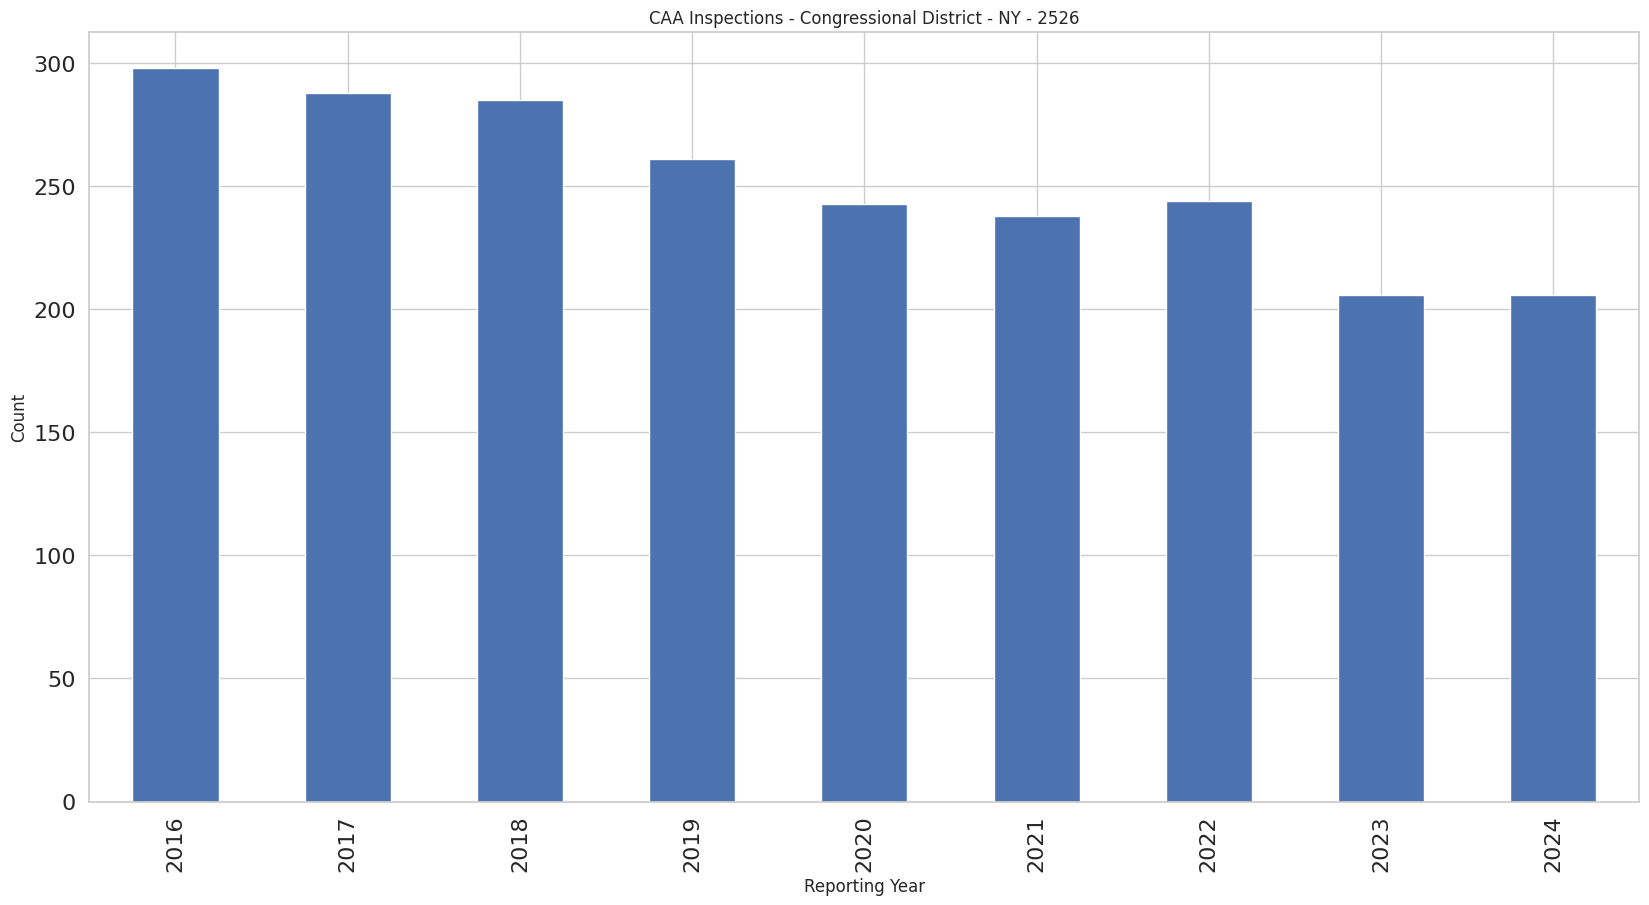

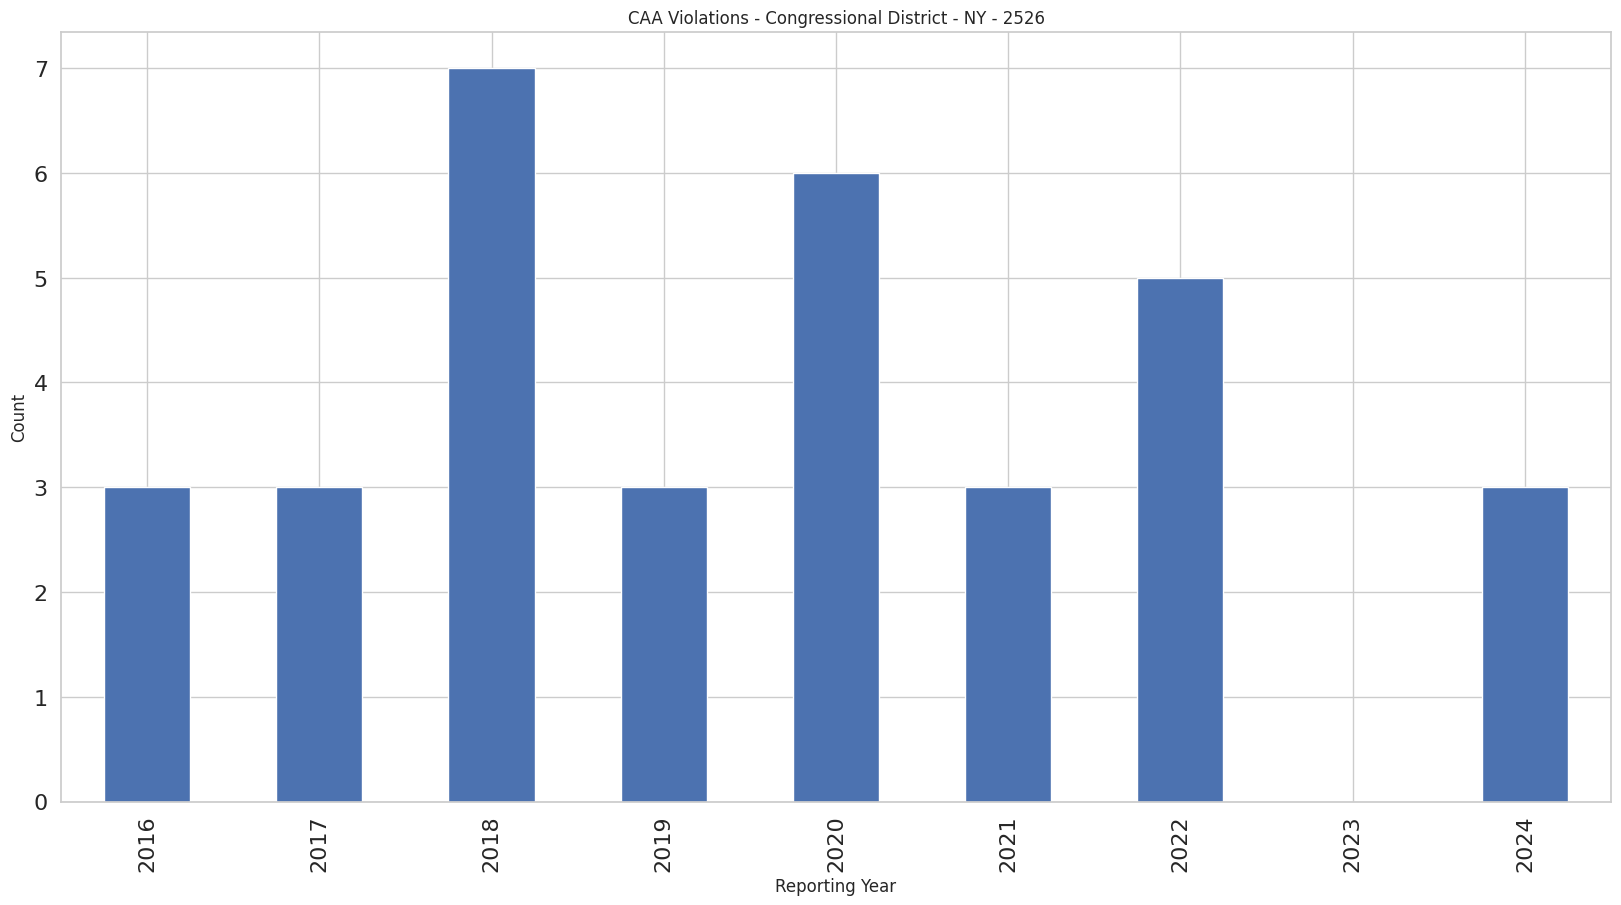

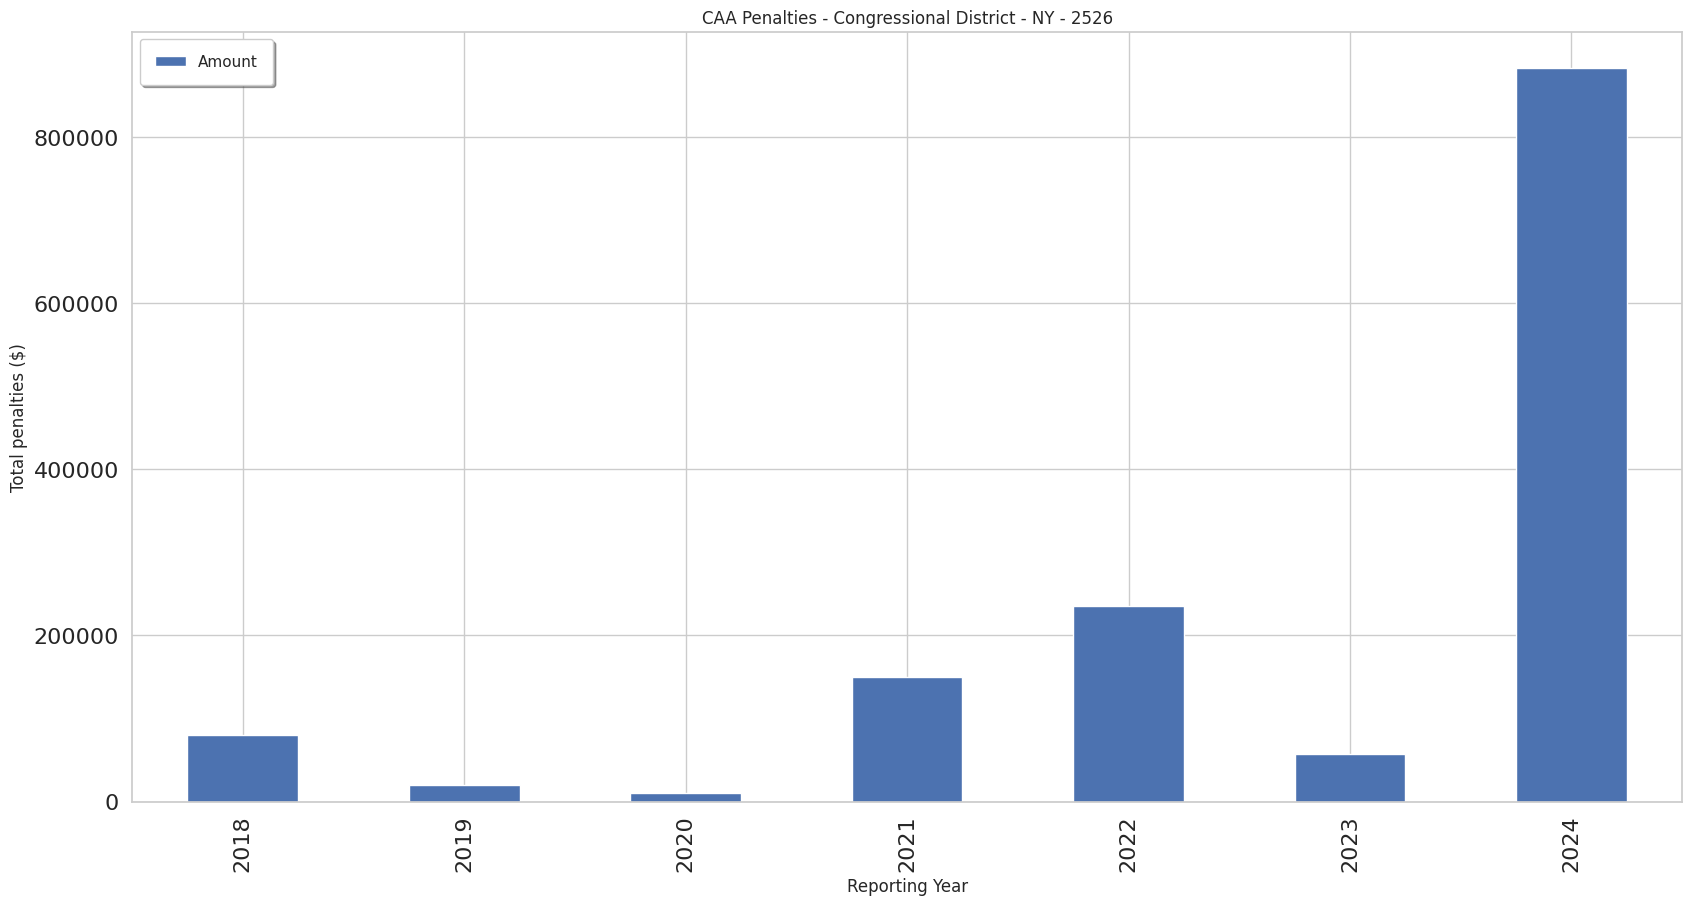

In [36]:
from ECHO_modules.make_data_sets import make_data_sets # Import relevant modules
from ECHO_modules.utilities import aggregate_by_facility, point_mapper

ny_cds_caa_inspections = data_sets["CAA Inspections"].store_results(
    region_type="Congressional District", region_value=["25", "26"], state = "NY",
    years=[2016,2024])
ny_cds_caa_violations = data_sets["CAA Violations"].store_results(
    region_type="Congressional District", region_value=["25", "26"], state = "NY",
    years=[2016,2024])
ny_cds_caa_penalties = data_sets["CAA Penalties"].store_results(
    region_type="Congressional District", region_value=["25", "26"], state = "NY",
    years=[2016,2024])

ny_cds_caa_inspections.show_chart()
ny_cds_caa_violations.show_chart()
ny_cds_caa_penalties.show_chart()

## GHGs and other Air Emissions
Beyond enforcement and compliance information, the ECHO database - and our copy of it at Stony Brook University - contains records of industry's self-report releases of various pollutants. These records originate from the Greenhouse Gas Reporting Program and the Toxics Release Inventory (TRI).

The following code returns these records for New York state. If you are interested in a specific GHG or TRI pollutant, some analysis would have to be written outside existing ECHO_modules - we haven't developed specific code to filter these tables to a pollutant(s). An example of this extra code is shown below, however - `ny_tri.dataframe.loc[ny_tri.dataframe['POLLUTANT_NAME'].str.lower().str.contains("mercury")]`

Data last modified: 2025-03-30 00:00:00
There were 5266 program records found
Data last modified: 2025-03-30 00:00:00
There were 14561 program records found


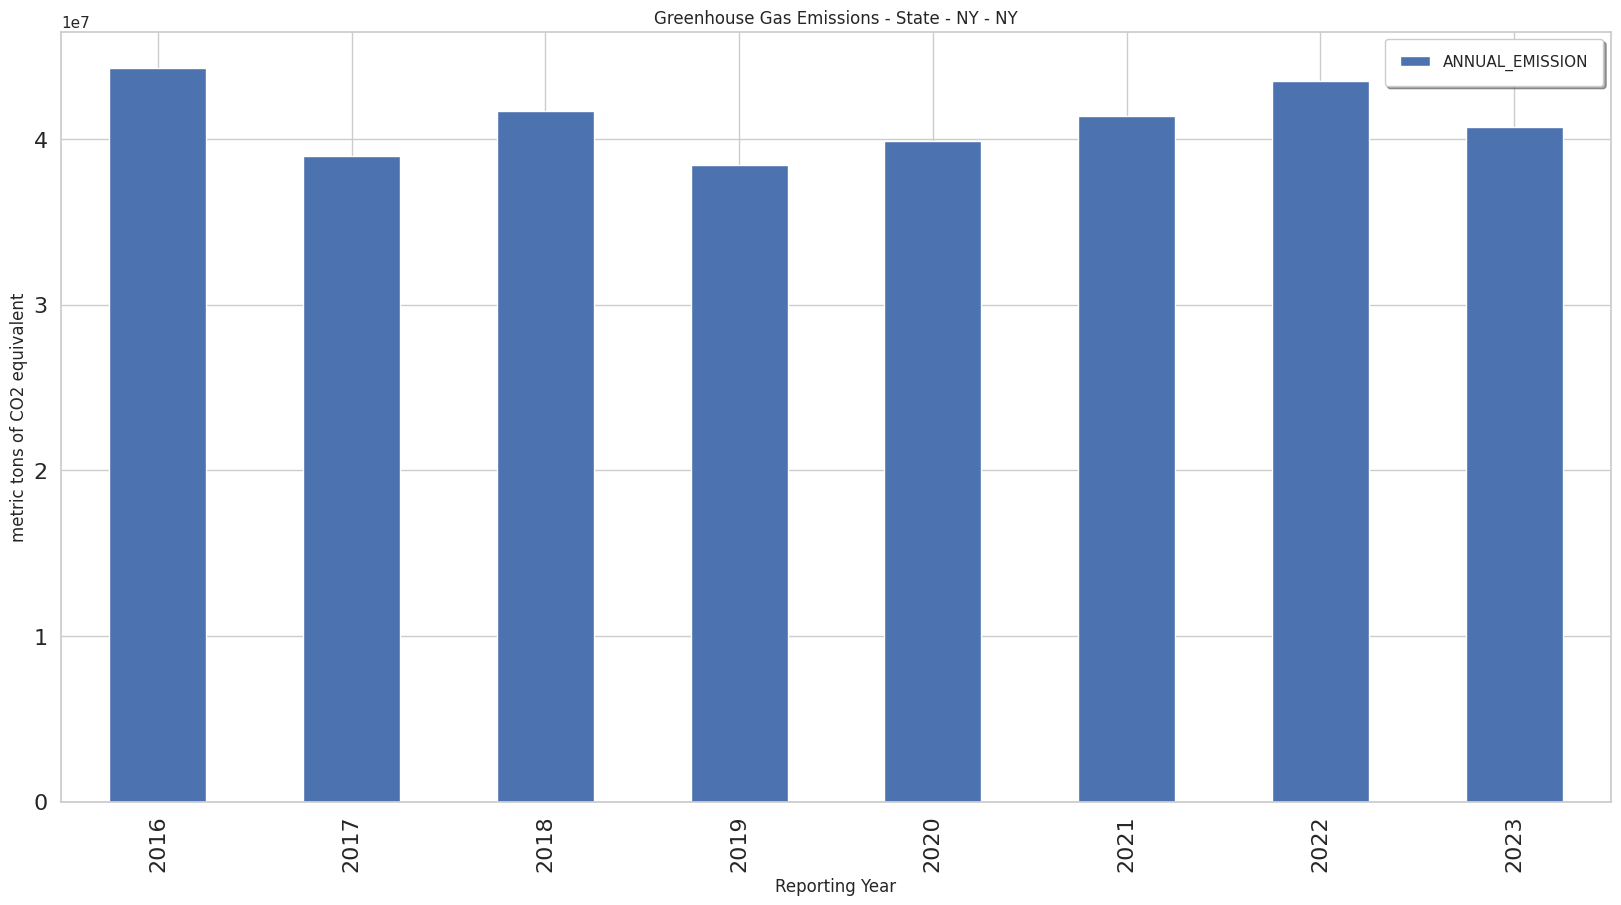

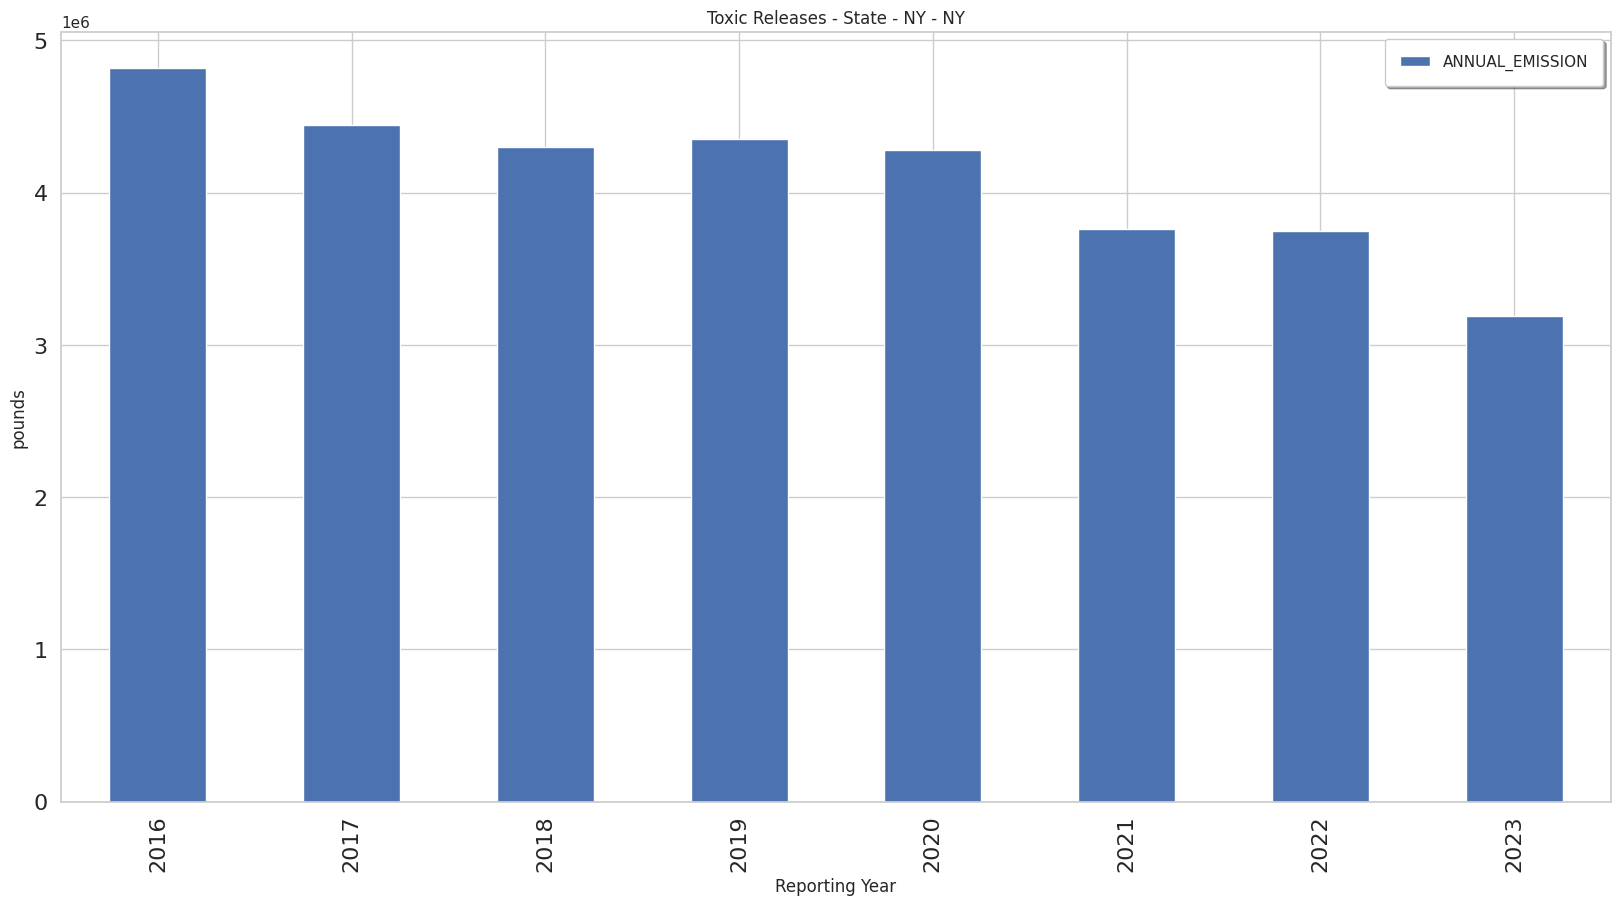

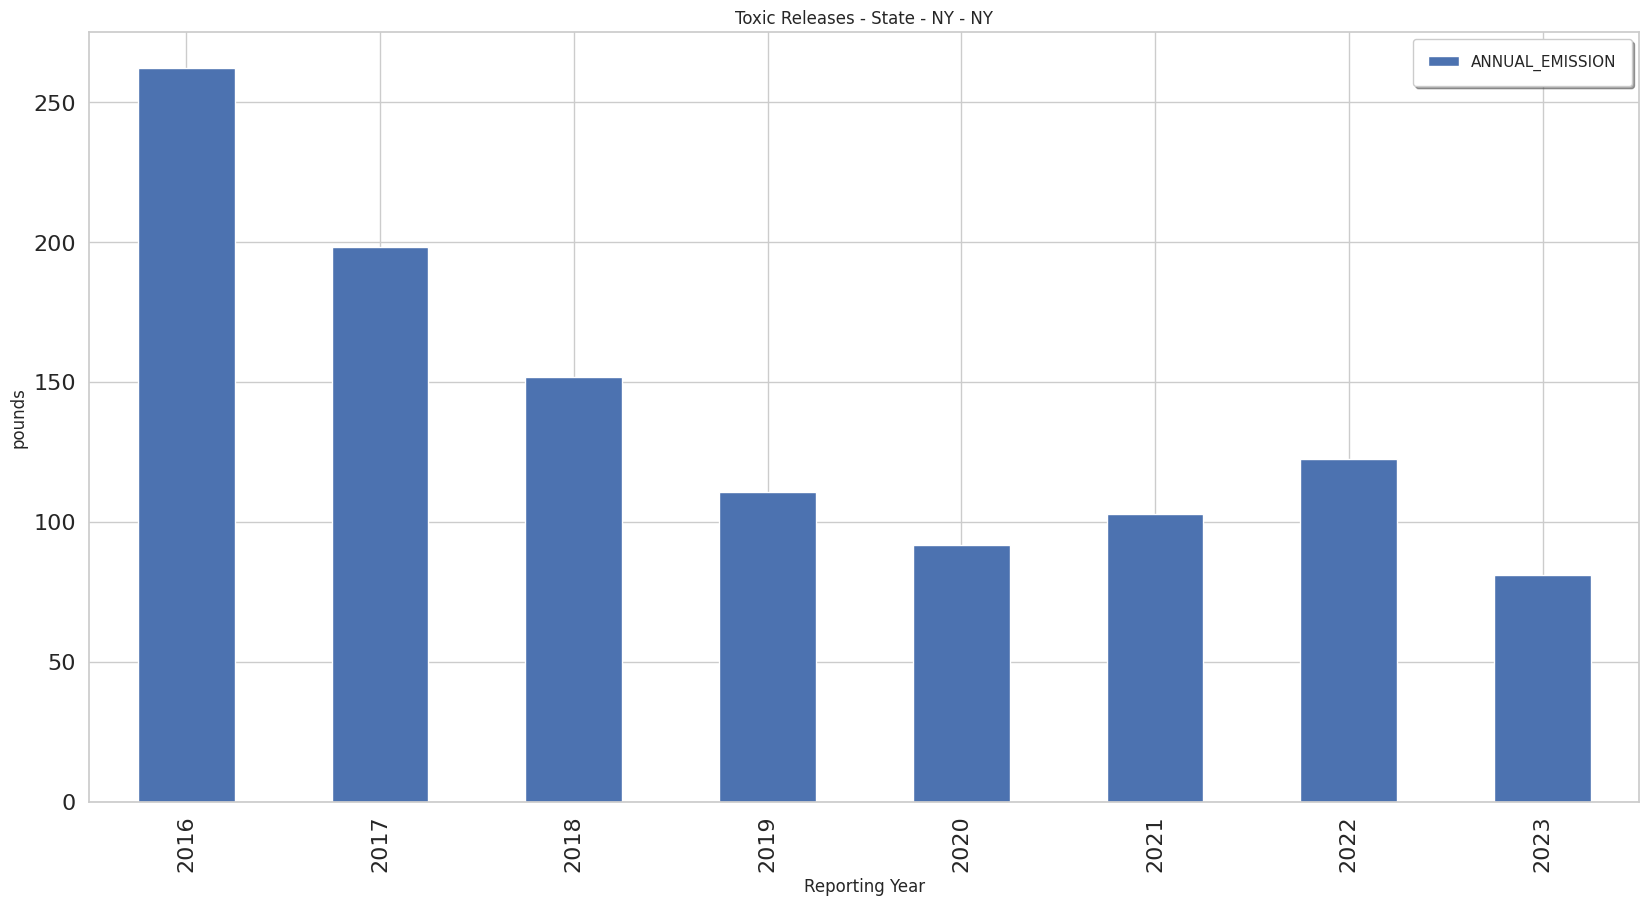

In [37]:
from ECHO_modules.make_data_sets import make_data_sets # Import relevant modules
from ECHO_modules.utilities import aggregate_by_facility, point_mapper

ny_ghg = data_sets["Greenhouse Gas Emissions"].store_results(
    region_type="State", region_value = "NY", state = "NY",
    years=[2016,2024])
ny_ghg.show_chart() # Total reported emissions in lbs (normalized to CO2e)
ny_tri = data_sets["Toxic Releases"].store_results(
    region_type="State", region_value = "NY", state = "NY",
    years=[2016,2024])
ny_tri.show_chart() # Total emissions in lbs

# Filter NY_TRI records to just ones where the pollutant is mercury
ny_tri.dataframe = ny_tri.dataframe.loc[
    ny_tri.dataframe['POLLUTANT_NAME'].str.lower().str.contains("mercury")]
ny_tri.show_chart() # Chart total mercury emissions in lbs

## Discharge Monitoring Reports (DMRs)

Facilities regulated under the Clean Water Act are required to submit monitoring reports directly to EPA. These represent extensive records of levels of pollutants discharged into waterbodies. We currently provide access to reports from Fiscal Year 2022.

The following code maps facilities with DMRs across two watersheds (note: watershed IDs currently have to be looked up separately. See "Watersheds" section above).

In [38]:
from ECHO_modules.get_data import get_spatial_data # Module for getting spatial data from the SBU database
from ECHO_modules.geographies import spatial_tables # Variables that support spatial queries
from ECHO_modules.utilities import bivariate_map, map_style # Use this function and variable to make our map

dmrs = data_sets["2022 Discharge Monitoring"].store_results(region_type="Watershed",
                                                     region_value = '04120103, 04120102')
# The facilities in this watershed
dmrs.dataframe = dmrs.dataframe.drop_duplicates(subset=["FAC_NAME"])
# Query and return spatial data
watersheds, state = get_spatial_data(region_type = "Watershed", states = ["NY"],
                                     spatial_tables = spatial_tables,
                                     region_filter = ["04120103", "04120102"])
# Map each unique DMR-reporting facility in these watersheds
# We only keep the columns we need (name, geometry) and use them for pop-ups
# with the fields/aliases parameters
bivariate_map(regions = watersheds[["name", "geometry"]],
              points = geopandas.GeoDataFrame(dmrs.dataframe,
                                              geometry=geopandas.points_from_xy(
                                                  dmrs.dataframe['FAC_LONG'],
                                                  dmrs.dataframe['FAC_LAT']),
                                                  crs=4269
                                              )[["FAC_NAME", "geometry"]],
              region_fields=["name",],
              region_aliases=["Watershed Name: ",],
              points_fields=["FAC_NAME",],
              points_aliases=["Facility Name: "],
              )

Data last modified: 2025-03-31 00:00:00
There were 16146 program records found


## Mapping
We can symbolize inspections, violations, and so on for areas such as ZIP Codes and Congressional Districts using the `choropleth()` function.

In [39]:
# Function for aggregating data by spatial unit and mapping data values by that unit (e.g. ZIP code)
from ECHO_modules.utilities import aggregate_by_geography, choropleth
from ECHO_modules.get_data import get_spatial_data # Function for getting zip code boundaries
from ECHO_modules.geographies import spatial_tables # Variables that support spatial queries

zips = '14201, 14202, 14203, 14204, 14205, 14206, 14207, 14208, 14209, 14210, 14211, \
14212, 14213, 14214, 14215, 14216, 14217, 14218, 14219, 14220, 14221, 14222, \
14223, 14224, 14225, 14226, 14227, 14228, 14231, 14233, 14240, 14241, 14260, \
14261, 14263, 14264, 14265, 14267, 14269, 14270, 14272, 14273, 14276, 14280'
# Create a duplicate but differently formatted list for the get_spatial_data function
zips_list = [str(z) for z in zips.split(", ")]

# Get attribute data
ny_zips_cwa_inspections = data_sets["CWA Violations"].store_results(region_type="Zip Code",
                                                             region_value=zips, state = "NY",
                                                             years=[2020,2024]) # Store results for this DataSet as a DataSetResults object


# Aggregate attribute data
ny_zips_aggregated = aggregate_by_geography(ny_zips_cwa_inspections,
                                            agg_type="sum",
                                            spatial_tables=spatial_tables)
# Reset the index to make the zip codes available to the choropleth function
ny_zips_aggregated.reset_index(inplace=True)

# Map
choropleth(polygons = ny_zips_aggregated,
           attribute = "NUME90Q",
           key_id = "FAC_ZIP",
           legend_name = "Map")

Data last modified: 2025-03-30 00:00:00
There were 1182 program records found


## Custom Queries: EJScreen

Records from EPA's EJScreen (2021) are available through custom SQL queries.

For example, the following returns EJScreen information for the state of New York and where the % of the population defined as a racial minority is greater than 75% and the % of the population defined as low-income is greater than 50%.

For more information about EJScreen, see the [documentation](https://gaftp.epa.gov/EJScreen/2021/2021_EJSCREEEN_columns-explained.xlsx) (.xlsx file).

In [40]:
from ECHO_modules.get_data import get_echo_data

# This query selects Census Block Group records from EJScreen for the state of New York and where the % of the population defined as a racial minority is greater than 75% and the % of the population defined as low-income is greater than 50%
sql = 'SELECT * FROM "EJSCREEN_2021_USPR" WHERE "ST_ABBREV" = \'NY\' ' +\
'AND "MINORPCT" > .75 AND "LOWINCPCT" > .5'
results = get_echo_data(sql)
results

OBJECTID            ID  ACSTOTPOP  ACSIPOVBAS  ACSEDUCBAS  ACSTOTHH  \
0       127692  360010001002       1275        1269         681       473   
1       127774  360010026004        846         846         414       327   
2       127693  360010002001       2188        2074        1078       925   
3       127695  360010002003       1350        1350         835       633   
4       127981  360050016001       3004        3004        1618      1029   
...        ...           ...        ...         ...         ...       ...   
1585    142868  361190109031       1666        1666         957       646   
1586    142900  361190116004       1665        1533        1097       515   
1587    141952  361059518004       1687        1687        1052       597   
1588    143014  361190143001       1089        1048         430       241   
1589    143016  361190143003       1206        1206        1012       749   

      ACSTOTHU  ACSUNEMPBAS  MINORPOP  MINORPCT  ...               T_PM25  \
0          534          607      1186  0.930196  ...  7.26 ug/m3 (16%ile)   
1          375          310       698  0.825059  ...  7.23 ug/m3 (15%ile)   
2         1089          946      2087  0.953839  ...  7.26 ug/m3 (16%ile)   
3         1002          628      1197  0.886667  ...  7.26 ug/m3 (16%ile)   
4         1029         1236      2973  0.989680  ...  8.95 ug/m3 (59%ile)   
...        ...          ...       ...       ...  ...                  ...   
1585       654          844      1634  0.980792  ...  8.51 ug/m3 (47%ile)   
1586       549          977      1516  0.910511  ...  8.42 ug/m3 (44%ile)   
1587       727          545      1485  0.880261  ...   6.69 ug/m3 (9%ile)   
1588       278          613       938  0.861341  ...  7.77 ug/m3 (27%ile)   
1589       770          493      1032  0.855721  ...  7.77 ug/m3 (27%ile)   

      T_PM25_D2                               T_UST  T_UST_D2   AREALAND  \
0        83%ile  7.3 facilities/sq km area (84%ile)    92%ile   356872.0   
1        77%ile  3.3 facilities/sq km area (69%ile)    82%ile  2742166.0   
2        93%ile  3.9 facilities/sq km area (73%ile)    92%ile  1449294.0   
3        85%ile  6.1 facilities/sq km area (81%ile)    91%ile   216941.0   
4        97%ile  7.1 facilities/sq km area (84%ile)    97%ile    77719.0   
...         ...                                 ...       ...        ...   
1585     88%ile    0 facilities/sq km area (16%ile)    63%ile   369185.0   
1586     89%ile  7.6 facilities/sq km area (85%ile)    94%ile   116149.0   
1587     88%ile  8.4 facilities/sq km area (86%ile)    95%ile  2230452.0   
1588     86%ile  5.9 facilities/sq km area (81%ile)    91%ile   215851.0   
1589     81%ile  8.1 facilities/sq km area (86%ile)    91%ile   130709.0   

      AREAWATER  NPL_CNT  TSDF_CNT  Shape_Length    Shape_Area  
0           0.0        0         0   3193.041281  6.605656e+05  
1      452838.0        0         2  11684.527625  5.905165e+06  
2           0.0        0         1   7321.882579  2.682032e+06  
3           0.0        0         0   3746.453457  4.013581e+05  
4           0.0        0         0   1487.858120  1.358439e+05  
...         ...      ...       ...           ...           ...  
1585        0.0        0         0   3910.294293  6.497000e+05  
1586        0.0        0         0   2047.776405  2.046170e+05  
1587    74552.0        0         0   9307.672910  4.131992e+06  
1588        0.0        0         0   3798.912199  3.826864e+05  
1589        0.0        0         0   2419.623987  2.317238e+05  

[1590 rows x 155 columns]